# Autoencoding for analysis of spectroscopic data

---

Lecture: "Physics-augmented machine learning" @ Cyber-Physical Simulation, TU Darmstadt

Lecturer: Prof. Oliver Weeger

Assistants: Dr.-Ing. Maximilian Kannapin, Jasper O. Schommartz, Dominik K. Klein

Summer term 2025

---

Experimental data by Ho et al.: ''Rapid identification of pathogenic bacteria using Raman spectroscopy and deep learning''. Nature Commuications 10:4927 (2019).



*Run the following cell to clone the GitHub repository in your current Google Colab environment.*

In [5]:
!git clone https://github.com/CPShub/LecturePhysicsAwareML.git

Cloning into 'LecturePhysicsAwareML'...
remote: Enumerating objects: 809, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 809 (delta 20), reused 21 (delta 13), pack-reused 745 (from 2)
Receiving objects: 100% (809/809), 140.75 MiB | 23.65 MiB/s, done.
Resolving deltas: 100% (338/338), done.
Updating files: 100% (189/189), done.


*Run the following cell to import all modules and python files to this notebook. If you made changes in the python files, run the following cell again to update the python files in this notebook. You might need to restart your Colab session first ("Runtime / Restart session" in the header menu).*


In [1]:
import tensorflow as tf
import datetime
now = datetime.datetime.now
import LecturePhysicsAwareML.Autoencoder.data as ld
import LecturePhysicsAwareML.Autoencoder.models as lm
import LecturePhysicsAwareML.Autoencoder.plots as lp

*Run this cell if you are executing the notebook locally on your device.*

In [ ]:
import tensorflow as tf
import datetime
now = datetime.datetime.now
import data as ld
import models as lm
import plots as lp

Matplotlib is building the font cache; this may take a moment.


*If you want to clone the repository again, you have to delete it from your Google Colab files first. For this, you can run the following cell.*

In [4]:
%rm -rf LecturePhysicsAwareML

Load full autoencoder and encoder

In [ ]:
latent_variables = 4
nodes = 64

units = [nodes,latent_variables,nodes,1000]
activation = ['softplus','linear','softplus','linear']
model_AE = lm.main(units=units, activation=activation)

units = [nodes,latent_variables]
activation = ['softplus','linear']
model_E = lm.main(units=units, activation=activation)

Define study and calibrate the autoencoder

Epoch 1/50
2/2 - 1s - 743ms/step - loss: 0.1734
Epoch 2/50
2/2 - 0s - 56ms/step - loss: 0.1243
Epoch 3/50
2/2 - 0s - 29ms/step - loss: 0.0895
Epoch 4/50
2/2 - 0s - 30ms/step - loss: 0.0651
Epoch 5/50
2/2 - 0s - 30ms/step - loss: 0.0503
Epoch 6/50
2/2 - 0s - 28ms/step - loss: 0.0411
Epoch 7/50
2/2 - 0s - 29ms/step - loss: 0.0354
Epoch 8/50
2/2 - 0s - 24ms/step - loss: 0.0325
Epoch 9/50
2/2 - 0s - 25ms/step - loss: 0.0310
Epoch 10/50
2/2 - 0s - 30ms/step - loss: 0.0294
Epoch 11/50
2/2 - 0s - 29ms/step - loss: 0.0281
Epoch 12/50
2/2 - 0s - 30ms/step - loss: 0.0270
Epoch 13/50
2/2 - 0s - 24ms/step - loss: 0.0257
Epoch 14/50
2/2 - 0s - 24ms/step - loss: 0.0244
Epoch 15/50
2/2 - 0s - 29ms/step - loss: 0.0230
Epoch 16/50
2/2 - 0s - 31ms/step - loss: 0.0218
Epoch 17/50
2/2 - 0s - 29ms/step - loss: 0.0203
Epoch 18/50
2/2 - 0s - 29ms/step - loss: 0.0189
Epoch 19/50
2/2 - 0s - 27ms/step - loss: 0.0176
Epoch 20/50
2/2 - 0s - 24ms/step - loss: 0.0164
Epoch 21/50
2/2 - 0s - 24ms/step - loss: 0.0154


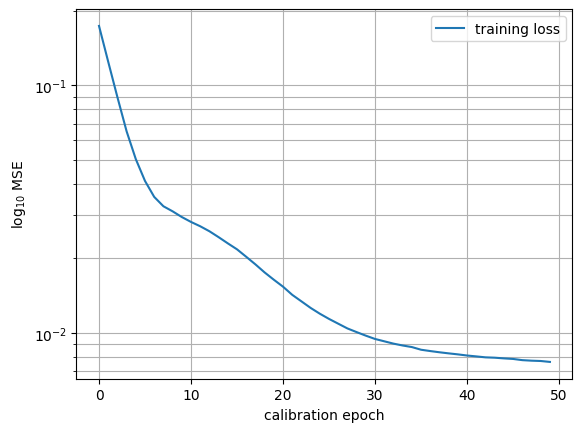

NameError: name 'spectra' is not defined

In [2]:
# define bacteria sets to be investigated (numbers between 0 and 29)
cases = [18,27,0,26]
wn_c, spectra_c, label_c = ld.load_data(cases)

epochs = 50
h = model_AE.fit([spectra_c], [spectra_c], epochs=epochs, verbose=2)

lp.plot_loss(h)

Visualize results

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_5']
Received: inputs=Tensor(shape=(40, 1000))
  warnings.warn(msg)
/content/LecturePhysicsAwareML/Autoencoder/plots.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


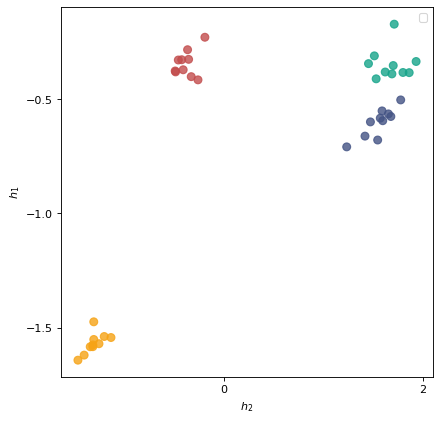

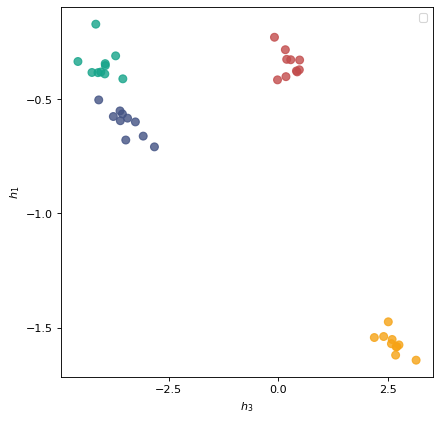

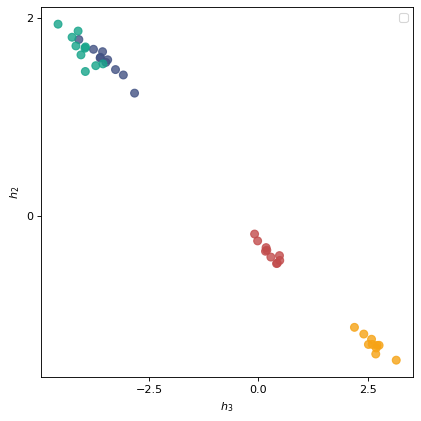

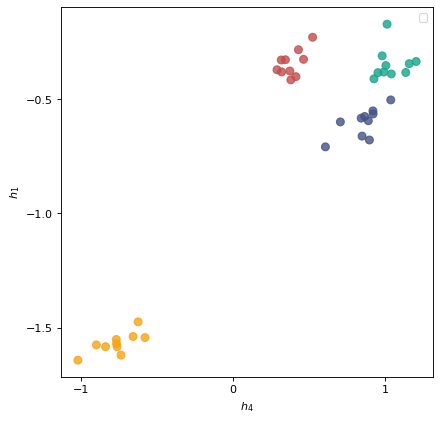

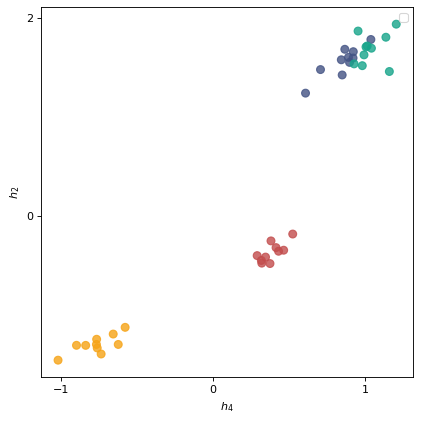

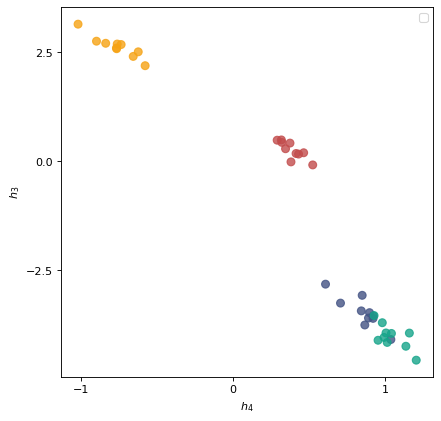

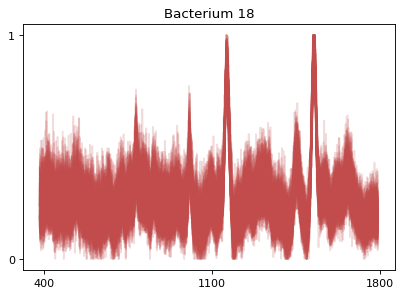

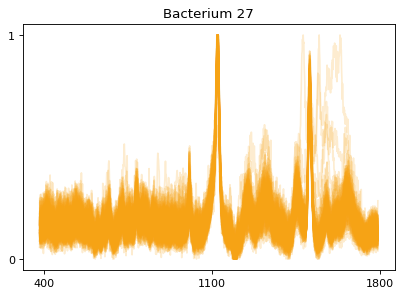

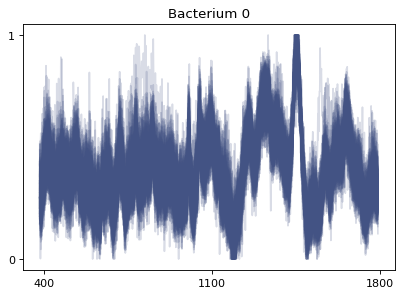

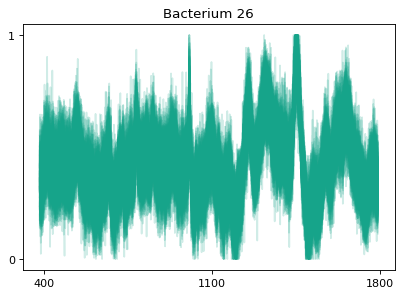

In [3]:
# set the parameters of the encoder
model_E.set_weights(model_AE.weights[0:4])

# plot latent space
for i in range(latent_variables):
    for j in range(latent_variables):
        if i!=j:
            if i>j:

                lp.plot_latent_space_ij(model_E, spectra_c, label_c, i, j)

# plot the different bacteria types
for i in range(len(cases)):

    wn, spectra = ld.load_single_case(cases[i])
    lp.plot_spectra(wn, spectra, i, cases[i])